# Support Vector Machines

Use support vector machines(SVMs) to build a spam classifer.

In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline

## 1 SVMs with linear kernel

Visualizing the dataset.

In [3]:
data = loadmat('data/ex6data1.mat')
X_raw = data['X']
y_raw = data['y'].ravel()

X_positive = X_raw[y_raw == 1]
X_negative = X_raw[y_raw == 0]
print(X_positive.shape)
print(X_negative.shape)

(21, 2)
(30, 2)


In [4]:
def plot_raw(positive, negative):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(positive[:, 0], positive[:, 1], s=50, marker='x', label='Positive')
    ax.scatter(negative[:, 0], negative[:, 1], s=50, marker='o', label='Negative')
    ax.legend()

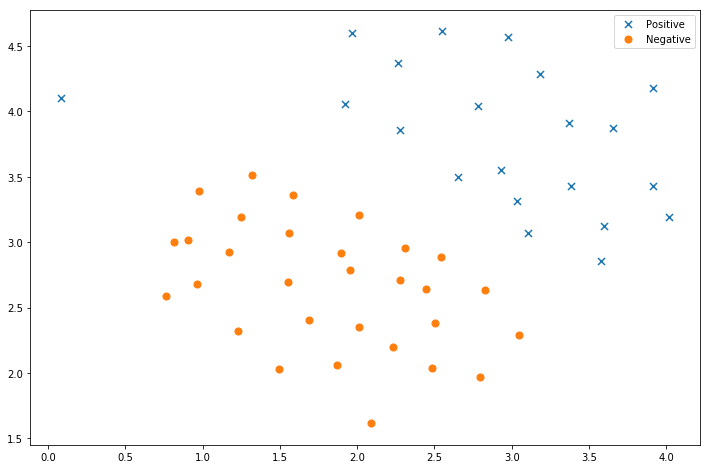

In [5]:
plot_raw(X_positive, X_negative)

In [6]:
def plot_decision_boundary(w, b, X_raw, C):
    '''
    w1x1 + w2x2 + b = 0 -> x2 = -w1x1/w2 - b/w2
    '''
    X = np.linspace(X_raw[:, 0].min(), X_raw[:, 0].max(), 100)
    y = -w[0] / w[1] * X - b / w[1]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(X, y, 'r', label='Decision boundary')
    ax.scatter(X_positive[:, 0], X_positive[:, 1], s=50, marker='x', label='Positive')
    ax.scatter(X_negative[:, 0], X_negative[:, 1], s=50, marker='o', label='Negative')
    ax.set_title('SVMs(C={}) Decision boundary'.format(C))
    ax.legend()

In [7]:
def plot_confidence(clf, X_raw):
    confidence = clf.decision_function(X_raw)

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(X_raw[:, 0], X_raw[:, 1], s=50, c=confidence, cmap='seismic')
    ax.set_title('Decision confidence')

### Try $C=1$

In [8]:
clf = svm.LinearSVC(C=1, loss='hinge', max_iter=3000)
clf.fit(X_raw, y_raw)
w = clf.coef_.ravel()
b = clf.intercept_
clf.score(X_raw, y_raw)

0.9803921568627451

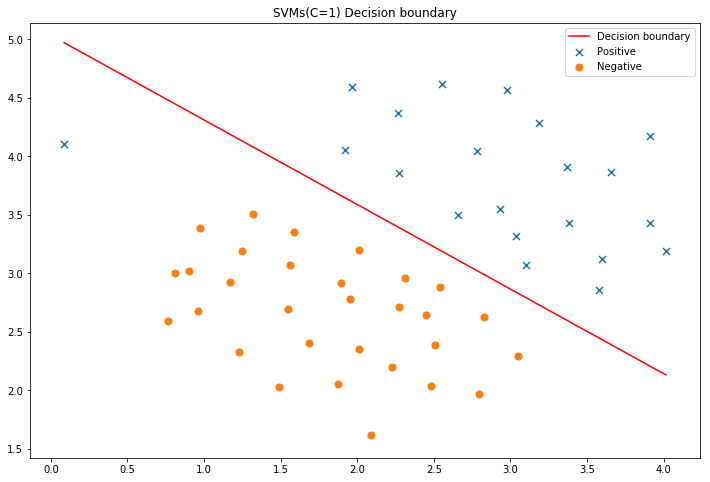

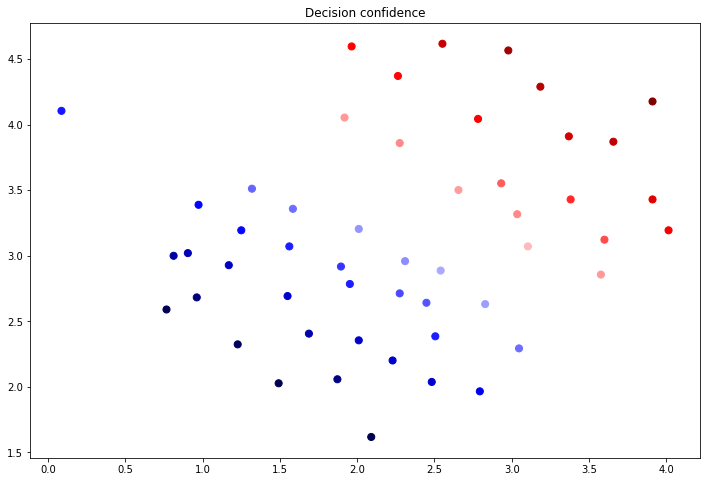

In [9]:
plot_decision_boundary(w, b, X_raw, 1)
plot_confidence(clf, X_raw)

### Try $C=1000$

In [10]:
clf = svm.LinearSVC(C=1000, loss='hinge', max_iter=200000)
clf.fit(X_raw, y_raw)
w = clf.coef_.ravel()
b = clf.intercept_
clf.score(X_raw, y_raw)

1.0

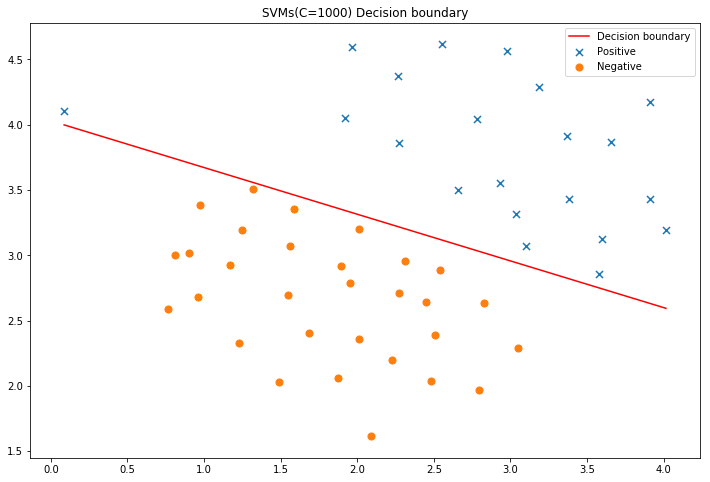

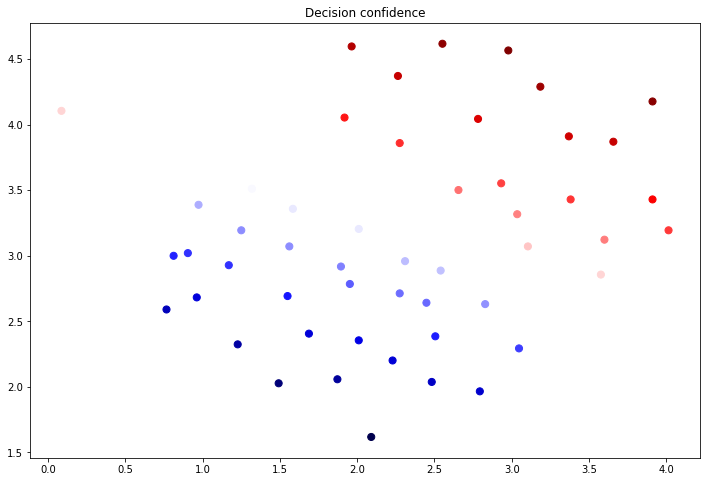

In [11]:
plot_decision_boundary(w, b, X_raw, 1000)
plot_confidence(clf, X_raw)

## 2 SVMs with gaussian kernel

In [12]:
data = loadmat('data/ex6data2.mat')
X_raw = data['X']
y_raw = data['y'].ravel()

X_positive = X_raw[y_raw == 1]
X_negative = X_raw[y_raw == 0]
print(X_positive.shape)
print(X_negative.shape)

(480, 2)
(383, 2)


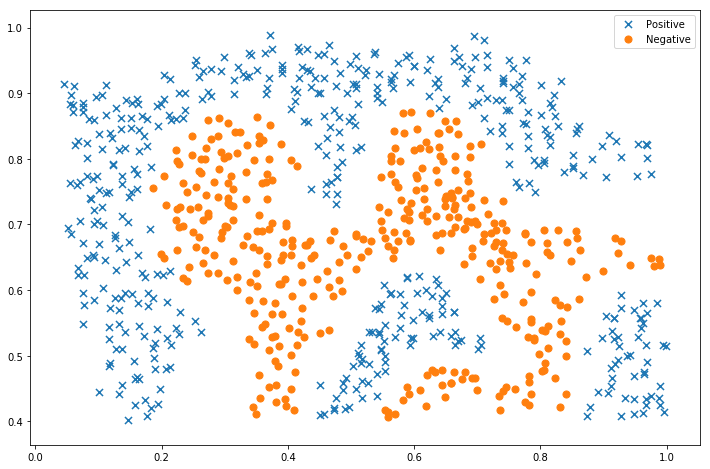

In [13]:
plot_raw(X_positive, X_negative)

### Gaussian kernel

In [14]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-((x1 - x2) ** 2).sum() / (2 * sigma ** 2))

In [15]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
gaussian_kernel(x1, x2, 2)

0.32465246735834974

### Try sklearn built-in gaussian kernel

In [16]:
clf = svm.SVC(C=100, kernel='rbf', gamma=10, probability=True)
clf.fit(X_raw, y_raw)
clf.score(X_raw, y_raw)

0.9698725376593279

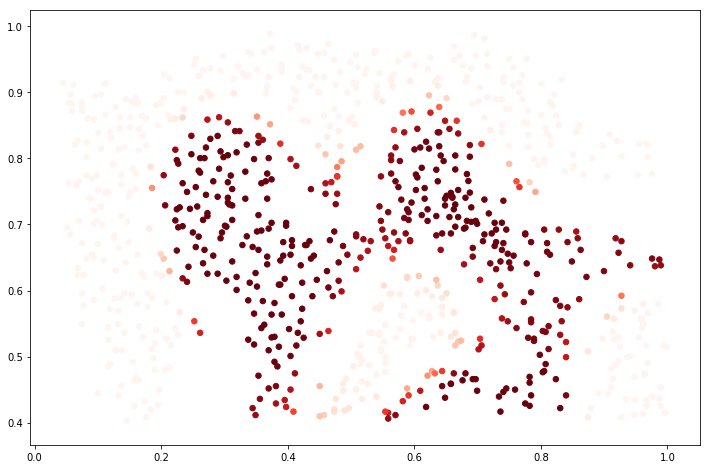

In [17]:
prob = clf.predict_proba(X_raw)[:, 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X_raw[:, 0], X_raw[:, 1], s=30, c=prob, cmap='Reds')

## Select best parameters with cross validation set

In [18]:
data = loadmat('data/ex6data3.mat')
X_train = data['X']
y_train = data['y'].ravel()
X_cv = data['Xval']
y_cv = data['yval'].ravel()

X_positive = X_train[y_train == 1]
X_negative = X_train[y_train == 0]
print(X_positive.shape)
print(X_negative.shape)

(106, 2)
(105, 2)


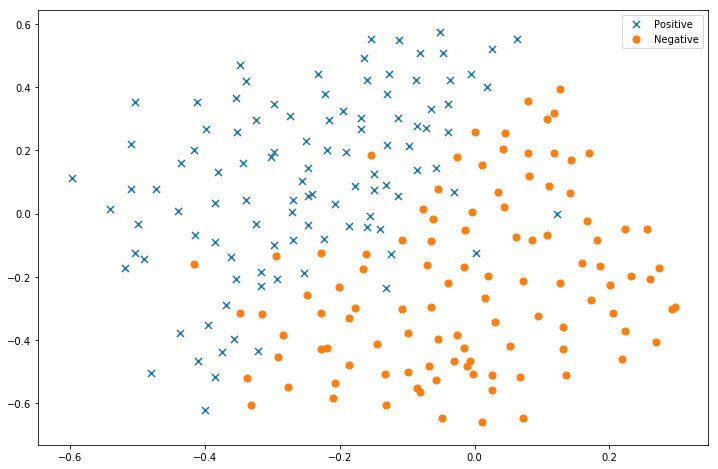

In [19]:
plot_raw(X_positive, X_negative)

In [20]:
def select_param(X_train, y_train, X_cv, y_cv, Cs, sigmas):
    best_score = 0
    best_param = {'C': None, 'sigma': None}
    
    for C in Cs:
        for sigma in sigmas:
            clf = svm.SVC(C=C, kernel='rbf', gamma=sigma)
            clf.fit(X_train, y_train)
            score = clf.score(X_cv, y_cv)
            
            if score > best_score:
                best_score = score
                best_param['C'] = C
                best_param['sigma'] = sigma
                
    return best_score, best_param

In [21]:
options = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
score, param = select_param(X_train, y_train, X_cv, y_cv, Cs=options, sigmas=options)
print(score)
print(param)

0.965
{'C': 3, 'sigma': 30}


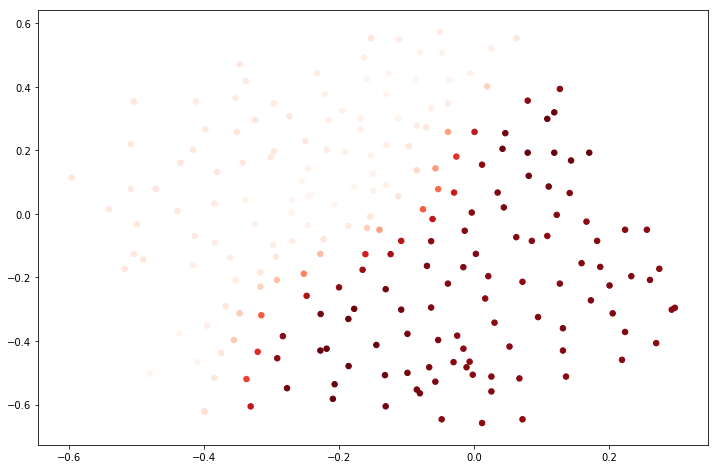

In [22]:
clf = svm.SVC(C=3, kernel='rbf', gamma=30, probability=True)
clf.fit(X_train, y_train)
prob = clf.predict_proba(X_train)[:, 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X_train[:, 0], X_train[:, 1], s=30, c=prob, cmap='Reds')